# Choose a time scoping for a transient analysis {#ref_transient_easy_time_scoping}

This example shows how to use a model\'s result to choose a time
scoping.


In [1]:
import matplotlib.pyplot as plt

from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core import operators as ops

Create the model and display the state of the result. This transient
result file contains several individual results, each at a different
times.


In [2]:
transient = examples.find_msup_transient()
model = dpf.Model(transient)
print(model)

DPF Model
------------------------------
Transient analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  velocity: Nodal Velocity      
     -  acceleration: Nodal Acceleration
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
------------------------------
DPF  Meshed Region: 
  393 nodes 
  40 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 20 
Cumulative     Time (

# Obtain minimum and maximum displacements at all times

Create a displacement operator and set its time scoping request to the
entire time frequency support:


In [3]:
disp = model.results.displacement
disp_op = disp.on_all_time_freqs()

# Chain the displacement operator with norm and min_max operators.
min_max_op = ops.min_max.min_max_fc(ops.math.norm_fc(disp_op))

min_disp = min_max_op.outputs.field_min()
max_disp = min_max_op.outputs.field_max()
print(max_disp.data)

[0.00031517 0.00163154 0.00409388 0.00693318 0.00939617 0.01105343
 0.01135235 0.01016139 0.00796552 0.00521109 0.00250834 0.00070916
 0.00019964 0.00098568 0.0030466  0.00581779 0.00846792 0.01049698
 0.0113754  0.01074555]


Plot the minimum and maximum displacements over time:


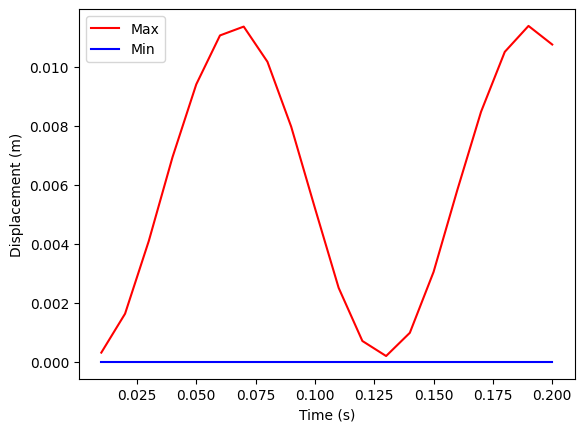

In [4]:
tdata = model.metadata.time_freq_support.time_frequencies.data
plt.plot(tdata, max_disp.data, "r", label="Max")
plt.plot(tdata, min_disp.data, "b", label="Min")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

# Use time extrapolation

A local maximum can be seen on the plot between 0.05 and 0.075 seconds.
Displacement is evaluated every 0.0005 seconds in this range to draw a
nicer plot on this range.


In [5]:
offset = 0.0005
time_scoping = [0.05 + offset * i for i in range(0, int((0.08 - 0.05) / offset))]
print(time_scoping)

[0.05, 0.0505, 0.051000000000000004, 0.051500000000000004, 0.052000000000000005, 0.052500000000000005, 0.053000000000000005, 0.053500000000000006, 0.054000000000000006, 0.05450000000000001, 0.055, 0.0555, 0.056, 0.0565, 0.057, 0.0575, 0.058, 0.0585, 0.059000000000000004, 0.059500000000000004, 0.060000000000000005, 0.060500000000000005, 0.061, 0.0615, 0.062, 0.0625, 0.063, 0.0635, 0.064, 0.0645, 0.065, 0.0655, 0.066, 0.0665, 0.067, 0.0675, 0.068, 0.0685, 0.069, 0.0695, 0.07, 0.07050000000000001, 0.07100000000000001, 0.07150000000000001, 0.07200000000000001, 0.07250000000000001, 0.07300000000000001, 0.07350000000000001, 0.07400000000000001, 0.07450000000000001, 0.07500000000000001, 0.07550000000000001, 0.07600000000000001, 0.0765, 0.077, 0.0775, 0.078, 0.0785, 0.079, 0.0795]


Create a displacement operator and set its time scoping request:


In [6]:
disp = model.results.displacement
disp_op = disp.on_time_scoping(time_scoping)()

# Chain the displacement operator with norm and min_max operators.
min_max_op = ops.min_max.min_max_fc(ops.math.norm_fc(disp_op))

min_disp = min_max_op.outputs.field_min()
max_disp = min_max_op.outputs.field_max()
print(max_disp.data)

[0.00939617 0.00947903 0.0095619  0.00964476 0.00972762 0.00981049
 0.00989335 0.00997621 0.01005908 0.01014194 0.0102248  0.01030766
 0.01039053 0.01047339 0.01055625 0.01063912 0.01072198 0.01080484
 0.01088771 0.01097057 0.01105343 0.01106838 0.01108332 0.01109827
 0.01111322 0.01112816 0.01114311 0.01115805 0.011173   0.01118794
 0.01120289 0.01121784 0.01123278 0.01124773 0.01126267 0.01127762
 0.01129256 0.01130751 0.01132245 0.0113374  0.01135235 0.0112928
 0.01123325 0.0111737  0.01111415 0.01105461 0.01099506 0.01093551
 0.01087596 0.01081642 0.01075687 0.01069732 0.01063777 0.01057822
 0.01051868 0.01045913 0.01039958 0.01034003 0.01028049 0.01022094]


Plot the minimum and maximum displacements over time:


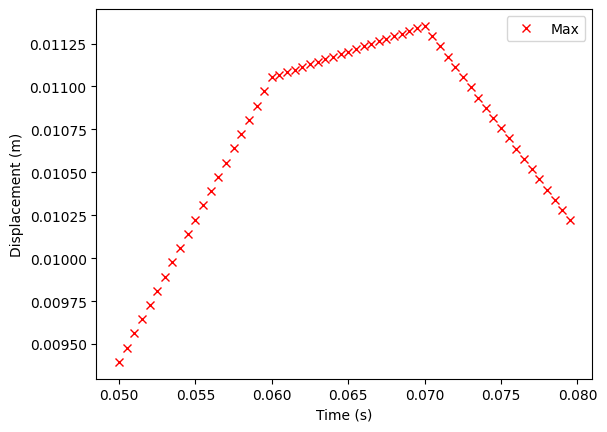

In [7]:
plt.plot(time_scoping, max_disp.data, "rx", label="Max")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()